# GMM and EM
Gaussian Mixture Models and Expectation Maximization.

Show distributions of antilogs for all cell lines.

In [1]:
import numpy as np
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture

In [2]:
try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/'  # must end in "/"
except:
    IN_COLAB = False
    DATA_DIR = 'D:/Adjeroh/Localization/TrainTest/'   # Windows
    DATA_DIR = '/Users/jasonmiller/WVU/Localization/TrainTest/'    # Mac
print(DATA_DIR)

/Users/jasonmiller/WVU/Localization/TrainTest/


In [3]:
GENES_FILE =    'CNRCI_noncoding_train_genes.csv'
RCI_FILE =      'CNRCI_noncoding_train_RCI.gc42.csv'

In [4]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080','HUVEC','MCF.7','NCI.H460','NHEK',\
     'SK.MEL.5','SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()

CELL_LINE = 0
print('Cell line for today',CELL_LINE,all_cell_lines[CELL_LINE])
EXCLUSIONS = [1,7]
for c in EXCLUSIONS:
    print('Exclude cell line',c,all_cell_lines[c])

Cell line for today 0 A549
Exclude cell line 1 H1.hESC
Exclude cell line 7 NCI.H460


In [5]:
class RCI_Loader():
    def __init__(self):
        self.cache=dict() 
        
    def load_gene_rci_values(self,filepath,cell_line):
        '''
        Load from RCI csv file.
        Return dict with keys=gene:str and values=RCI:float.
        '''
        gene_to_rci = {}
        overall_sum = 0
        with open (filepath,'r') as handle:
            header = None
            for row in handle:
                if header is None:
                    header = row # skip file's header line
                else:
                    line = row.strip()
                    fields = line.split(',')
                    gene_id = fields.pop(0)
                    rci_str = fields[cell_line]
                    if rci_str != "nan":
                        rci_val = float(rci_str)
                        gene_to_rci[gene_id] = rci_val
        return gene_to_rci

In [6]:
def plot(X,num_bins=100):
    pyplot.hist(X, bins=num_bins, density=True)
    pyplot.show()
    
def show_gmm(model,X):
    print(model)
    print('AIC',model.aic(X),'BIC',model.bic(X),'score',model.score(X))
    for i in range(model.n_components):
        print('Gaussian',i,'mean=',model.means_[i],
            'wgt=',model.weights_[i], 'cov=',model.covariances_[i])

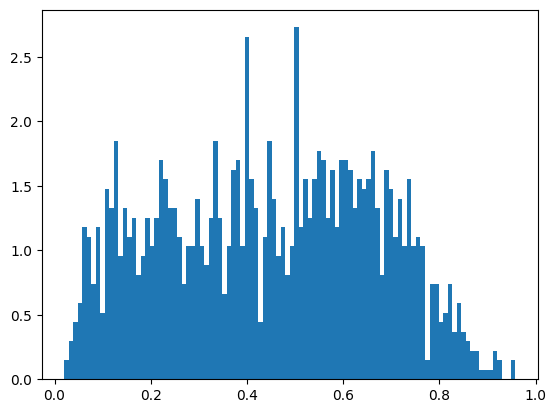

Cell Line 0 A549
GaussianMixture(covariance_type='spherical')
AIC -269.0182802362439 BIC -258.46378478298095 score 0.09433941957022941
Gaussian 0 mean= [0.44521692] wgt= 1.0 cov= 0.048483328621034105
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -417.8546924130635 BIC -391.4684537799061 score 0.1478419807923509
Gaussian 0 mean= [0.25016906] wgt= 0.45812271879988675 cov= 0.015491307233788219
Gaussian 1 mean= [0.61011745] wgt= 0.5418772812001131 cov= 0.017020298298166953


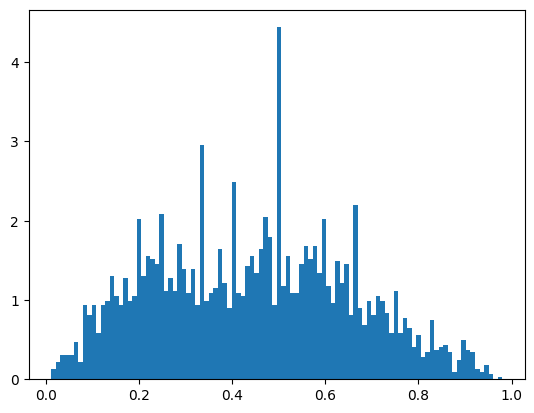

Cell Line 1 H1.hESC
GaussianMixture(covariance_type='spherical')
AIC -902.1332442282468 BIC -889.9135916762099 score 0.1361787262140437
Gaussian 0 mean= [0.44514622] wgt= 1.0 cov= 0.044591496791277024
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -1081.777466172317 BIC -1051.2283347922246 score 0.1640783688266181
Gaussian 0 mean= [0.26786104] wgt= 0.45793440513643335 cov= 0.014422637687415764
Gaussian 1 mean= [0.59491588] wgt= 0.5420655948635666 cov= 0.02109510989120192


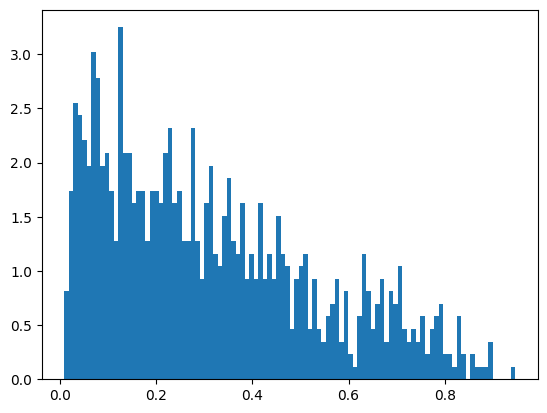

Cell Line 2 HeLa.S3
GaussianMixture(covariance_type='spherical')
AIC -165.9257594827505 BIC -156.27918723803913 score 0.09245144694382508
Gaussian 0 mean= [0.31180269] wgt= 1.0 cov= 0.04866674129990954
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -347.9381640988009 BIC -323.82173348702247 score 0.19474328841066424
Gaussian 0 mean= [0.17585981] wgt= 0.6257639887858933 cov= 0.011736833313760223
Gaussian 1 mean= [0.53911422] wgt= 0.37423601121410666 cov= 0.027845716094813983


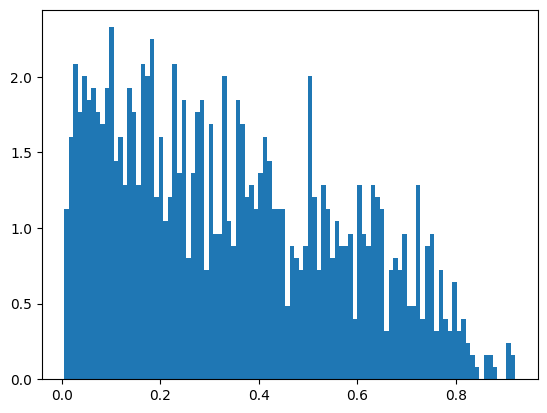

Cell Line 3 HepG2
GaussianMixture(covariance_type='spherical')
AIC -177.33429494575816 BIC -166.90087597233924 score 0.06656912442942664
Gaussian 0 mean= [0.34257] wgt= 1.0 cov= 0.05125224772232309
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -397.55222818158876 BIC -371.4686807480415 score 0.1496153554264276
Gaussian 0 mean= [0.18310613] wgt= 0.576094784747 cov= 0.012991229605603697
Gaussian 1 mean= [0.55928425] wgt= 0.42390521525299996 cov= 0.021726495818431696


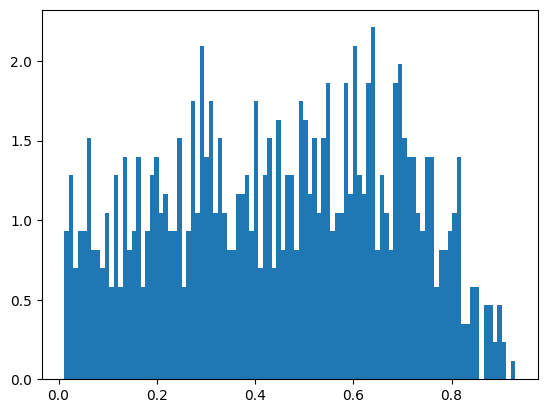

Cell Line 4 HT1080
GaussianMixture(covariance_type='spherical')
AIC -57.08481820204331 BIC -47.401587249088124 score 0.032630778954082965
Gaussian 0 mean= [0.44976546] wgt= 1.0 cov= 0.05485179356332001
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -165.14705276384944 BIC -140.9389753814615 score 0.09356145980974863
Gaussian 0 mean= [0.63083645] wgt= 0.5329650607274099 cov= 0.017061192754146554
Gaussian 1 mean= [0.24313315] wgt= 0.46703493927259004 cov= 0.01786517003862588


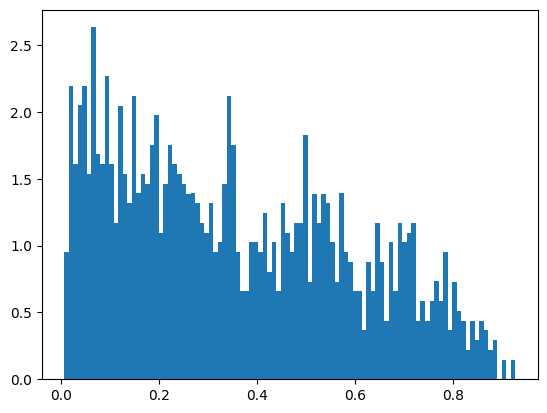

Cell Line 5 HUVEC
GaussianMixture(covariance_type='spherical')
AIC -45.78698495956086 BIC -35.176608528774786 score 0.016729497634261042
Gaussian 0 mean= [0.35563505] wgt= 1.0 cov= 0.05662422389102323
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -328.83659792035775 BIC -302.31065684339256 score 0.11385638370979763
Gaussian 0 mean= [0.57694316] wgt= 0.4454538720622877 cov= 0.023459264344311143
Gaussian 1 mean= [0.17786345] wgt= 0.5545461279377124 cov= 0.012319819928168772


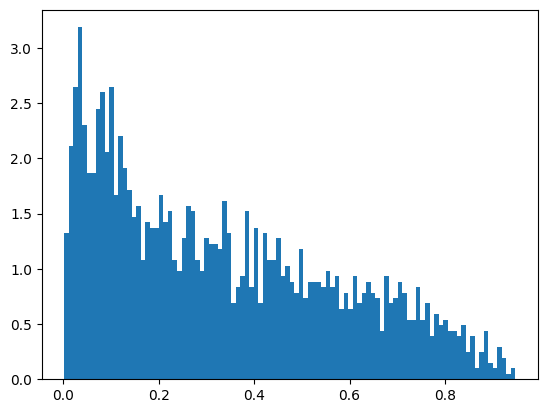

Cell Line 6 MCF.7
GaussianMixture(covariance_type='spherical')
AIC 54.49064223121418 BIC 65.84266209527196 score -0.011709332613917945
Gaussian 0 mean= [0.33172836] wgt= 1.0 cov= 0.05993817184415222
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -544.0118329063054 BIC -515.6317832461609 score 0.12848140837344743
Gaussian 0 mean= [0.49224913] wgt= 0.5734427232970564 cov= 0.03970122826638153
Gaussian 1 mean= [0.11593208] wgt= 0.42655727670294363 cov= 0.00593590902801086


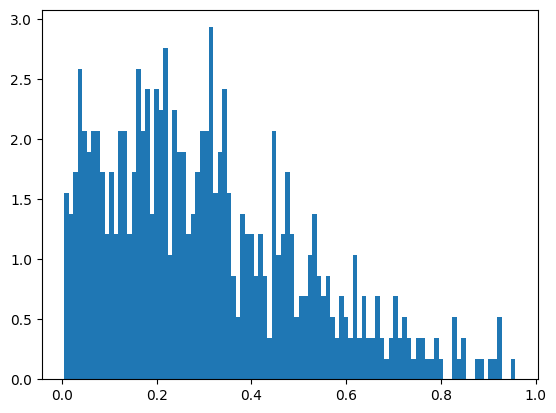

Cell Line 7 NCI.H460
GaussianMixture(covariance_type='spherical')
AIC -179.46891544208557 BIC -170.64199752775085 score 0.15038435691974228
Gaussian 0 mean= [0.30614652] wgt= 1.0 cov= 0.04334245201655888
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -263.9859398368649 BIC -241.91864505102808 score 0.22457863921054497
Gaussian 0 mean= [0.1928324] wgt= 0.6586963640878337 cov= 0.013088778222838547
Gaussian 1 mean= [0.52483624] wgt= 0.3413036359121663 cov= 0.029124471499152677


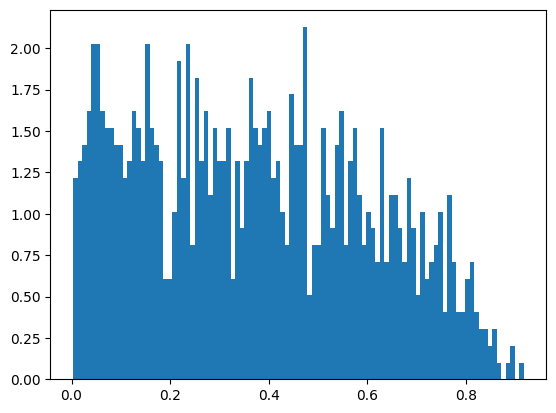

Cell Line 8 NHEK
GaussianMixture(covariance_type='spherical')
AIC -97.31790263260538 BIC -87.34846999236885 score 0.046906436403983974
Gaussian 0 mean= [0.37104023] wgt= 1.0 cov= 0.05330787659218958
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -222.1495947215418 BIC -197.22601312095048 score 0.10747666422293602
Gaussian 0 mean= [0.56974226] wgt= 0.4715084158366831 cov= 0.021347260795878148
Gaussian 1 mean= [0.19376271] wgt= 0.5284915841633169 cov= 0.015169704514170218


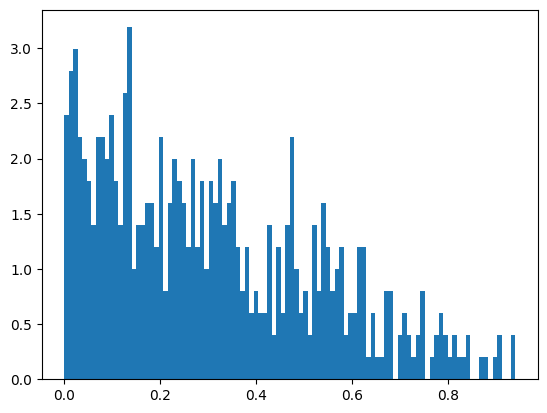

Cell Line 9 SK.MEL.5
GaussianMixture(covariance_type='spherical')
AIC -73.86458029902836 BIC -65.30378862110797 score 0.07290691039234866
Gaussian 0 mean= [0.30581079] wgt= 1.0 cov= 0.050606708776164244
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -165.01940151485834 BIC -143.61742232005736 score 0.1638758441150359
Gaussian 0 mean= [0.53664554] wgt= 0.37928876647507986 cov= 0.02691021546668057
Gaussian 1 mean= [0.16475803] wgt= 0.6207112335249202 cov= 0.012630815134845862


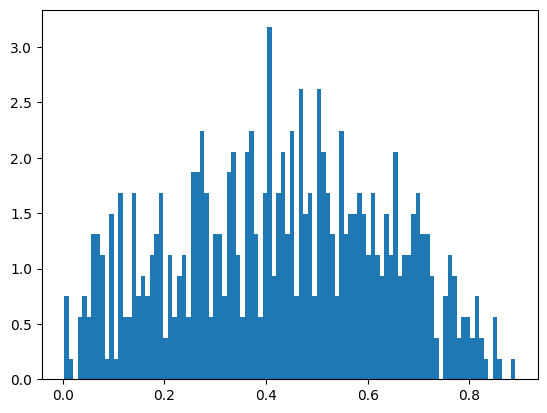

Cell Line 10 SK.N.DZ
GaussianMixture(covariance_type='spherical')
AIC -184.37907334444697 BIC -175.5752389509926 score 0.15620155335360444
Gaussian 0 mean= [0.42848037] wgt= 1.0 cov= 0.042841122523157915
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -210.77913444198072 BIC -188.7695484583448 score 0.18306727565670042
Gaussian 0 mean= [0.257032] wgt= 0.46446842367652236 cov= 0.01761019253498633
Gaussian 1 mean= [0.57717814] wgt= 0.5355315763234777 cov= 0.017118978143243563


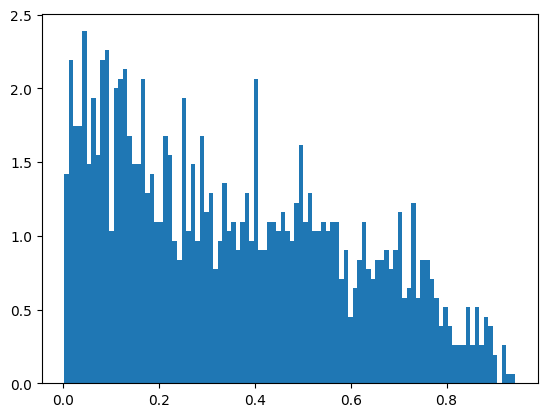

Cell Line 11 SK.N.SH
GaussianMixture(covariance_type='spherical')
AIC 24.55902434295773 BIC 35.37244580331301 score -0.006241355295372717
Gaussian 0 mean= [0.35515236] wgt= 1.0 cov= 0.059286272718222593
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -324.50420698183245 BIC -297.47065333094423 score 0.10154954674615435
Gaussian 0 mean= [0.53224847] wgt= 0.5465281441970138 cov= 0.032226648192208746
Gaussian 1 mean= [0.14171463] wgt= 0.45347185580298627 cov= 0.008544105527279565


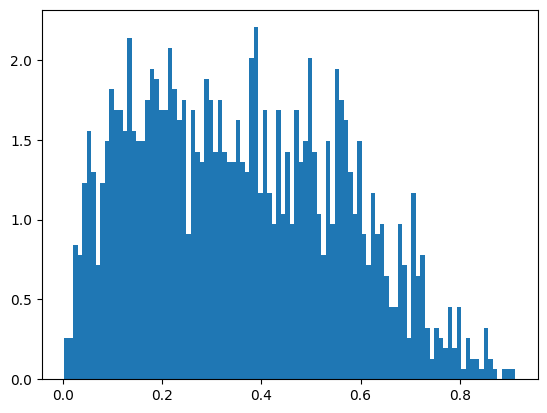

Cell Line 12 GM12878
GaussianMixture(covariance_type='spherical')
AIC -600.4665065387094 BIC -589.5920938049668 score 0.17799367094779428
Gaussian 0 mean= [0.35903422] wgt= 1.0 cov= 0.04101407303445678
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -778.0403873102882 BIC -750.8543554759318 score 0.2320495840136302
Gaussian 0 mean= [0.52495397] wgt= 0.48806198588946653 cov= 0.018802071534665815
Gaussian 1 mean= [0.20085271] wgt= 0.5119380141105335 cov= 0.010923313800723816


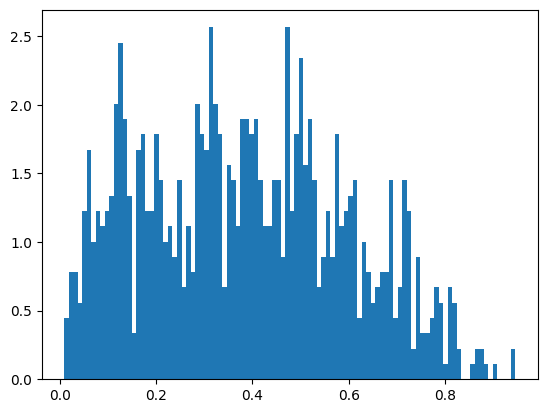

Cell Line 13 K562
GaussianMixture(covariance_type='spherical')
AIC -250.46395954965362 BIC -240.7342639937119 score 0.13280999976495492
Gaussian 0 mean= [0.38564324] wgt= 1.0 cov= 0.04489293749425316
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -310.59221627719586 BIC -286.26797738734155 score 0.16732370369373478
Gaussian 0 mean= [0.22253508] wgt= 0.5054377875201649 cov= 0.01477643458726755
Gaussian 1 mean= [0.55233819] wgt= 0.4945622124798351 cov= 0.020695196384834996


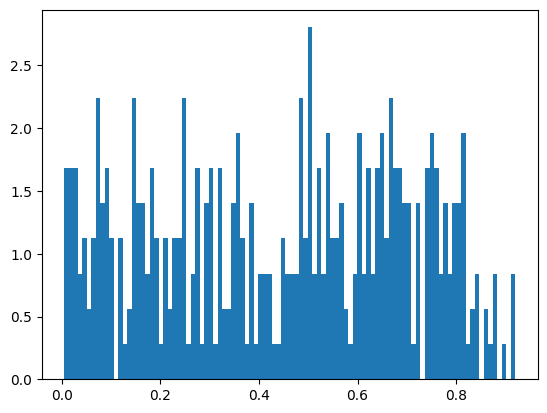

Cell Line 14 IMR.90
GaussianMixture(covariance_type='spherical')
AIC 43.661604391064884 BIC 51.59389786931227 score -0.05084821075777549
Gaussian 0 mean= [0.44336716] wgt= 1.0 cov= 0.06481843552883995
GaussianMixture(covariance_type='spherical', n_components=2)
AIC -26.261799007962317 BIC -6.431065312343854 score 0.046489485907644
Gaussian 0 mean= [0.6392383] wgt= 0.5521896437230643 cov= 0.018319694453466456
Gaussian 1 mean= [0.20184077] wgt= 0.4478103562769357 cov= 0.016512437227753446


In [7]:
filename = DATA_DIR + RCI_FILE
loader = RCI_Loader()

for CELL_LINE in range(15):
    gene_to_rci = loader.load_gene_rci_values(filename,CELL_LINE)
    logs = list(gene_to_rci.values())
    antilogs = np.power(2,logs)
    cyto_pct = [x/(1+x) for x in antilogs]
    plot(cyto_pct)
    
    print('Cell Line',CELL_LINE,all_cell_lines[CELL_LINE])
    values = np.array(cyto_pct)
    values = values.reshape(-1, 1)
    model = GaussianMixture(n_components=1, verbose=0, covariance_type='spherical') 
    model.fit(values)
    show_gmm(model,values)
    model = GaussianMixture(n_components=2, verbose=0, covariance_type='spherical') 
    model.fit(values)
    show_gmm(model,values)